In [4]:
import time
import datetime
import copy
import numpy as np
import math

import pandas as pd
import json
from bson.json_util import dumps
from fastparquet import ParquetFile,write
import matplotlib.pyplot as plt
from tqdm import tqdm

from cm2df import cm2df,precision_recall_fscore_support_metrics2df

In [5]:
pf=ParquetFile('full_3rd_eventfeatures_110619.parq')

In [6]:
udf=pf.to_pandas()

In [7]:
udf.columns

Index(['category', 'past', 'votes', 'is_eventbrite', 'is_free', 'doors',
       'sold_out', 'venue.id', 'venue.popularity', 'venue.zip',
       'ticket_allages', 'ticket_price_low', 'ticket_price_max', 'min_age',
       'artist.popularity.sum', 'artist.popularity.avg',
       'artist.popularity.max', 'dow', 'doy', 'month', 'day', 'hour',
       'venue.tol_num_events', 'ev_id', 'title', 'venue.title',
       'venue.address', 'venue.city', 'venue.state', 'venue.latitude',
       'venue.longitude', 'duration', 'duration_day', 'multiday',
       'avg_votes_pday'],
      dtype='object')

In [21]:
pd.set_option('display.max_columns', None)
udf.head()

,category,past,votes,is_eventbrite,is_free,doors,sold_out,venue.id,venue.popularity,venue.zip,ticket_allages,ticket_price_low,ticket_price_max,min_age,artist.popularity.sum,artist.popularity.avg,artist.popularity.max,dow,doy,month,day,hour,venue.tol_num_events,ev_id,title,venue.title,venue.address,venue.city,venue.state,venue.latitude,venue.longitude,duration,duration_day,multiday,avg_votes_pday
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11049447,0,0,784,0,0,1,0,113,15.0,78701,1,0.0,0.0,0,73238.0,73238.0,73238.0,3,276,10,3,19,377,11049447,Gary Clark Jr,Stubb's,801 Red River,Austin,TX,30.268458,-97.736175,7.0,1.0,False,784.0
11049456,0,0,223,0,0,1,0,175439,15.0,78741,0,0.0,0.0,18,101.0,101.0,101.0,3,276,10,3,20,116,11049456,Hippie Sabotage w/ Sebastian Paul,Emo's,2015 E. Riverside Dr.,Austin,TX,30.240266,-97.728516,6.0,1.0,False,223.0
11049430,0,0,163,0,0,1,0,654,15.0,78702,1,0.0,0.0,0,3770.0,1885.0,1885.0,3,276,10,3,18,237,11049430,FIDLAR w/ XETAS,Historic Scoot Inn,1308 E. Fourth,Austin,TX,30.262141,-97.729385,7.5,1.0,False,163.0
11141496,1,0,126,1,0,1,0,302617,1.0,78701,0,10.0,12.0,0,0.0,0.0,0.0,3,276,10,3,19,244,11141496,Hear Me Bitch 90’s Birthday Bash Comedy Show,Fallout Theater,616 Lavaca St,Austin,TX,30.269536,-97.745230,6.5,1.0,False,126.0
11109390,1,0,83,0,1,0,0,3519,1.0,78702,0,0.0,0.0,0,98.0,14.0,14.0,3,276,10,3,21,85,11109390,Brixton Comedy Hour,The Brixton,1412 E. 6th Street,Austin,TX,30.263590,-97.727604,5.0,1.0,False,83.0


In [27]:
# neutrolize the venue ids:
rank=udf['venue.id'].value_counts()
# create the mapping dictionary
cat_list=rank.index.values
encoded_data, mapping_index = pd.Series(cat_list).factorize()

In [35]:
encode_dict=dict(zip(mapping_index,encoded_data))

In [39]:
udf['venue.id']=udf['venue.id'].map(encode_dict)

In [43]:
udf['venue.zip'].values[0]

'78701'

In [75]:
# neutrolize the zip codes:
#udf.replace({'venue.zip':'Austin'},'78701',inplace=True)
#udf.replace({'venue.zip':'787613'},'78761',inplace=True)
#udf.replace({'venue.zip':'78644-9716'},'78644',inplace=True)
#udf.replace({'venue.zip':'78768-2113'},'78768',inplace=True)
#udf.replace({'venue.zip':'78732-6046 '},'78732',inplace=True)
#udf.replace({'venue.zip':''},'0',inplace=True)
#udf.replace({'venue.zip':'78660 '},'78660',inplace=True)
#udf.replace({'venue.zip':'78757 '},'78757',inplace=True)
#udf.replace({'venue.zip':'787'},'0',inplace=True)
a=udf['venue.zip'].values
rep=[int(x) if x else None for x in a]
udf['venue.zip']=rep

In [76]:
udf['venue.zip']=udf['venue.zip'].fillna(0)

In [80]:
a=udf['venue.zip'].value_counts()
cat_list=a.index.values
encoded_zip, mapping_index = pd.Series(cat_list).factorize()
encode_dict_zip=dict(zip(mapping_index,encoded_zip))

In [82]:
udf['venue.zip']=udf['venue.zip'].map(encode_dict_zip)

In [4]:
udf.head()

,category,past,votes,is_eventbrite,is_free,doors,sold_out,venue.id,venue.popularity,venue.zip,...,venue.title,venue.address,venue.city,venue.state,venue.latitude,venue.longitude,duration,duration_day,multiday,avg_votes_pday
id,,,,,,,,,,,,,,,,,,,,,
11049447,0,0,784,0,0,1,0,15,15.0,0,...,Stubb's,801 Red River,Austin,TX,30.268458,-97.736175,7.0,1.0,False,784.0
11049456,0,0,223,0,0,1,0,70,15.0,8,...,Emo's,2015 E. Riverside Dr.,Austin,TX,30.240266,-97.728516,6.0,1.0,False,223.0
11049430,0,0,163,0,0,1,0,29,15.0,2,...,Historic Scoot Inn,1308 E. Fourth,Austin,TX,30.262141,-97.729385,7.5,1.0,False,163.0
11141496,1,0,126,1,0,1,0,28,1.0,0,...,Fallout Theater,616 Lavaca St,Austin,TX,30.269536,-97.745230,6.5,1.0,False,126.0
11109390,1,0,83,0,1,0,0,94,1.0,2,...,The Brixton,1412 E. 6th Street,Austin,TX,30.263590,-97.727604,5.0,1.0,False,83.0


In [95]:
write('subset_feature_4ML_110619.parq',udf)

In [83]:
# decide on particular set of columns to use
usecolsX=['category', 'past', 'is_eventbrite', 'is_free', 'doors',
       'sold_out', 'venue.id', 'venue.popularity', 'venue.zip',
       'ticket_allages', 'ticket_price_low', 'ticket_price_max', 'min_age',
       'artist.popularity.sum', 'artist.popularity.avg',
       'artist.popularity.max', 'dow', 'doy', 'month', 'day', 'hour',
       'venue.tol_num_events', 'duration', 'duration_day', 'multiday']
usecoly1=['votes']
usecoly2=['avg_votes_pday']

In [84]:
udf_X=udf[usecolsX]
udf_y=udf[usecoly1]

In [85]:
# scaling of the features
from sklearn.preprocessing import MinMaxScaler
# scale regression dataset
scalar = MinMaxScaler()
scalar.fit(udf_X)
X = scalar.transform(udf_X)

In [86]:
# create udf_y based on 3 classes: low, mid, high
def get_class(df,thre1,thre2):
    n=len(df)
    newdf=[]
    cut1=min([thre1,thre2])
    cut2=max([thre1,thre2])
    for item in df:
        if item<cut1: newdf+=[0]
        elif (item<cut2) and (item>=cut1):newdf+=[1]
        else: newdf+=[2]
    return newdf

In [87]:
y=get_class(udf_y.values,50,1000)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
RFModel0=RandomForestClassifier(random_state=12,verbose=10)

In [90]:
RFModel0.fit(X_train,y_train)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12,
                       verbose=10, warm_start=False)

In [91]:
pred_y_train=RFModel0.predict(X_train)
pred_y_test=RFModel0.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

In [92]:
# check performance on confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve
print("confusion matrix:",confusion_matrix(y_test, pred_y_test))
print("other metrics:",classification_report(y_test, pred_y_test))

confusion matrix: [[9259   72    0]
 [ 309  213    0]
 [   5    5    1]]
other metrics:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9331
           1       0.73      0.41      0.52       522
           2       1.00      0.09      0.17        11

    accuracy                           0.96      9864
   macro avg       0.90      0.50      0.56      9864
weighted avg       0.95      0.96      0.95      9864



In [93]:
cm_as_df=cm2df(confusion_matrix(y_test, pred_y_test),[0,1,2])
cm_as_df=cm_as_df.rename(columns={0: "pred_0",1: "pred_1", 2: "pred_2"})
cm_as_df.to_csv('CML_Perf/RF_25feat_0p3testnoweights_CM_110619.csv')

### The error rate (miss) on high votes events are high!

In [94]:
# try weighting the classes
RFModel1=RandomForestClassifier(random_state=12,verbose=10,class_weight='balanced')

In [95]:
RFModel1.fit(X_train,y_train)
pred_y_train=RFModel1.predict(X_train)
pred_y_test=RFModel1.predict(X_test)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

In [96]:
print("confusion matrix:",confusion_matrix(y_test, pred_y_test))
print("other metrics:",classification_report(y_test, pred_y_test))

confusion matrix: [[9276   55    0]
 [ 335  187    0]
 [   7    3    1]]
other metrics:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      9331
           1       0.76      0.36      0.49       522
           2       1.00      0.09      0.17        11

    accuracy                           0.96      9864
   macro avg       0.91      0.48      0.54      9864
weighted avg       0.95      0.96      0.95      9864



In [97]:
cm_as_df=cm2df(confusion_matrix(y_test, pred_y_test),[0,1,2])
cm_as_df=cm_as_df.rename(columns={0: "pred_0",1: "pred_1", 2: "pred_2"})
cm_as_df.to_csv('CML_Perf/RF_25feat_0p3test_w_weights_CM_110619.csv')

In [98]:
# test train-test split based on the class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=12)

In [99]:
RFModel2=RandomForestClassifier(random_state=12,verbose=10) # no class weight
RFModel2.fit(X_train,y_train)
pred_y_train=RFModel2.predict(X_train)
pred_y_test=RFModel2.predict(X_test)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

In [100]:
print("confusion matrix:",confusion_matrix(y_test, pred_y_test))
print("other metrics:",classification_report(y_test, pred_y_test))

confusion matrix: [[9252   80    0]
 [ 311  207    1]
 [   6    6    1]]
other metrics:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9332
           1       0.71      0.40      0.51       519
           2       0.50      0.08      0.13        13

    accuracy                           0.96      9864
   macro avg       0.72      0.49      0.54      9864
weighted avg       0.95      0.96      0.95      9864



In [101]:
cm_as_df=cm2df(confusion_matrix(y_test, pred_y_test),[0,1,2])
cm_as_df=cm_as_df.rename(columns={0: "pred_0",1: "pred_1", 2: "pred_2"})
cm_as_df.to_csv('CML_Perf/RF_25feat_0p3test_splityratio_noweights_CM_110619.csv')

In [104]:
RFModel3=RandomForestClassifier(random_state=12,verbose=10,class_weight='balanced') # with class weight
RFModel3.fit(X_train,y_train)
pred_y_train=RFModel3.predict(X_train)
pred_y_test=RFModel3.predict(X_test)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

In [105]:
print("confusion matrix:",confusion_matrix(y_test, pred_y_test))
print("other metrics:",classification_report(y_test, pred_y_test))

confusion matrix: [[9273   59    0]
 [ 324  194    1]
 [   9    3    1]]
other metrics:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9332
           1       0.76      0.37      0.50       519
           2       0.50      0.08      0.13        13

    accuracy                           0.96      9864
   macro avg       0.74      0.48      0.54      9864
weighted avg       0.95      0.96      0.95      9864



In [106]:
cm_as_df=cm2df(confusion_matrix(y_test, pred_y_test),[0,1,2])
cm_as_df=cm_as_df.rename(columns={0: "pred_0",1: "pred_1", 2: "pred_2"})
cm_as_df.to_csv('CML_Perf/RF_25feat_0p3test_splityratio_w_weights_CM_110619.csv')

category 0.0350018667481823
past 0.0024444139736695845
is_eventbrite 0.009004554213840148
is_free 0.013309707960906176
doors 0.052069439429610814
sold_out 0.003844557555189605
venue.id 0.05880747087069622
venue.popularity 0.02828811695452142
venue.zip 0.033573830529921994
ticket_allages 0.020012350362486248
ticket_price_low 0.035055659574570006
ticket_price_max 0.024444141976170994
min_age 0.023132114545947508
artist.popularity.sum 0.13054506667497745
artist.popularity.avg 0.0787038515232895
artist.popularity.max 0.07702238509216985
dow 0.038474458412280366
doy 0.07584577694705334
month 0.04204533016135288
day 0.05597838495153809
hour 0.04060256170392801
venue.tol_num_events 0.05897801468475898
duration 0.05546660752686767
duration_day 0.003929011573229142
multiday 0.0034203260528418346


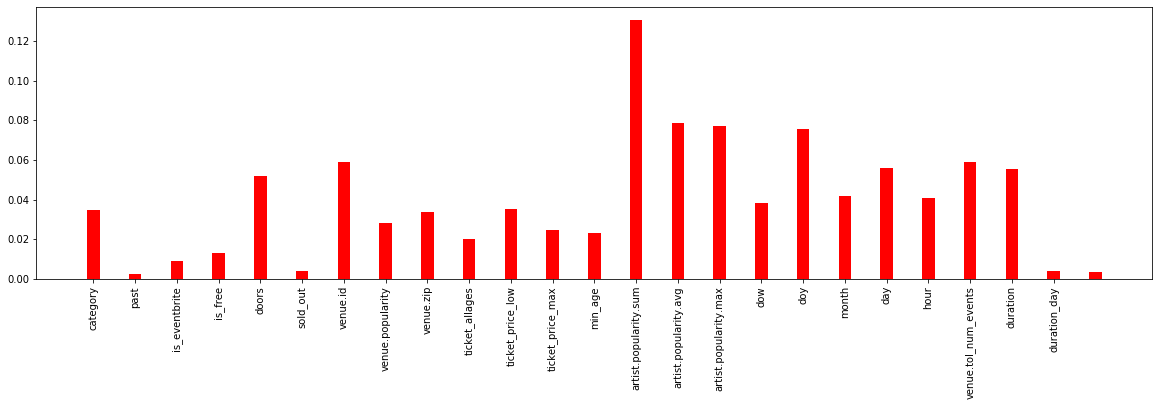

In [34]:
# take a look at feature importance
f_importance = pd.DataFrame({'feature':udf_X.columns, 'importance':RFModel0.feature_importances_})
#plot histogram
lenc = len(udf_X.columns)
x_tick_label=[None]*lenc
hist_val=np.zeros(lenc)
for i in range(0,lenc):
    hist_val[i] = f_importance.values[i][1]
    x_tick_label[i] = f_importance.values[i][0]
    print(x_tick_label[i],hist_val[i])
    
index = np.arange(lenc)+1
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(1, lenc, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

In [44]:
# use a subset of features that are "more important" than 0.03
mask=f_importance.values[:,1]>0.03
maskcol=f_importance.values[:,0][mask]

In [47]:
udf_X = udf[maskcol]
udf_y1 = udf['votes']
udf_y2 = udf['avg_votes_pday']

In [48]:
udf_X.head()

,category,doors,venue.id,venue.zip,ticket_price_low,artist.popularity.sum,artist.popularity.avg,artist.popularity.max,dow,doy,month,day,hour,venue.tol_num_events,duration
id,,,,,,,,,,,,,,,
11049447,0,1,15,0,0.0,73238.0,73238.0,73238.0,3,276,10,3,19,377,7.0
11049456,0,1,70,8,0.0,101.0,101.0,101.0,3,276,10,3,20,116,6.0
11049430,0,1,29,2,0.0,3770.0,1885.0,1885.0,3,276,10,3,18,237,7.5
11141496,1,1,28,0,10.0,0.0,0.0,0.0,3,276,10,3,19,244,6.5
11109390,1,0,94,2,0.0,98.0,14.0,14.0,3,276,10,3,21,85,5.0


In [51]:
scalar = MinMaxScaler()
scalar.fit(udf_X)
X = scalar.transform(udf_X)

In [57]:
# convert y to categories
y=get_class(udf_y1.values,50,1000)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=12)

In [107]:
RFModel3=RandomForestClassifier(random_state=12,verbose=10) # no class weight
RFModel3.fit(X_train,y_train)
pred_y_train=RFModel3.predict(X_train)
pred_y_test=RFModel3.predict(X_test)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

In [108]:
print("confusion matrix:",confusion_matrix(y_test, pred_y_test))
print("other metrics:",classification_report(y_test, pred_y_test))

confusion matrix: [[9252   80    0]
 [ 311  207    1]
 [   6    6    1]]
other metrics:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9332
           1       0.71      0.40      0.51       519
           2       0.50      0.08      0.13        13

    accuracy                           0.96      9864
   macro avg       0.72      0.49      0.54      9864
weighted avg       0.95      0.96      0.95      9864



In [80]:
cm_as_df=cm2df(confusion_matrix(y_test, pred_y_test),[0,1,2])
cm_as_df=cm_as_df.rename(columns={0: "pred_0",1: "pred_1", 2: "pred_2"})

In [82]:
cm_as_df.to_csv('CML_Perf/RF_15feat_0p3testnoweights_CM_110719.csv')

In [121]:
from sklearn.metrics import precision_recall_fscore_support
a=precision_recall_fscore_support(y_test, pred_y_test)

In [131]:
pres=a[0]
recal=a[1]